GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/workspaces/eng-ai-agents/.venv/lib/python3.11/site-packages/anomalib/engine/engine.py:391: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Pleas

Predicting: |          | 0/? [00:00<?, ?it/s]

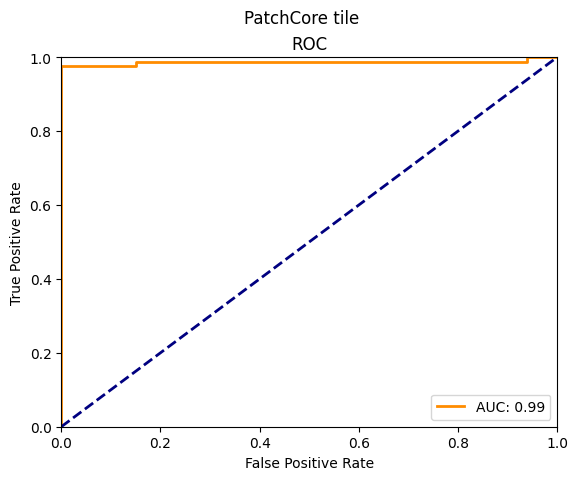

PatchCore tile AUROC:  0.9870129823684692


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/workspaces/eng-ai-agents/.venv/lib/python3.11/site-packages/anomalib/engine/engine.py:391: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Pleas

Predicting: |          | 0/? [00:00<?, ?it/s]

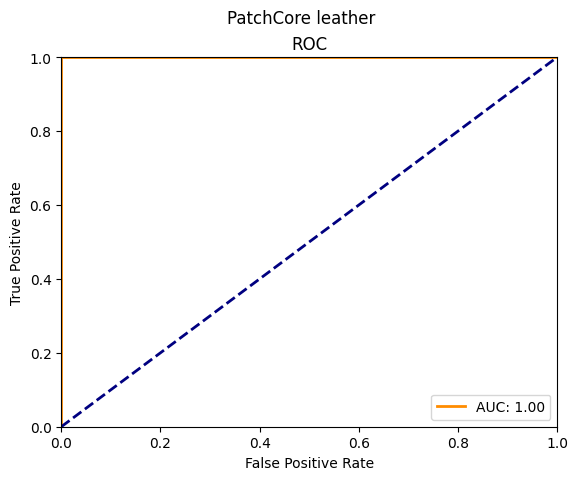

PatchCore leather AUROC:  1.0


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/workspaces/eng-ai-agents/.venv/lib/python3.11/site-packages/anomalib/engine/engine.py:391: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Pleas

Predicting: |          | 0/? [00:00<?, ?it/s]

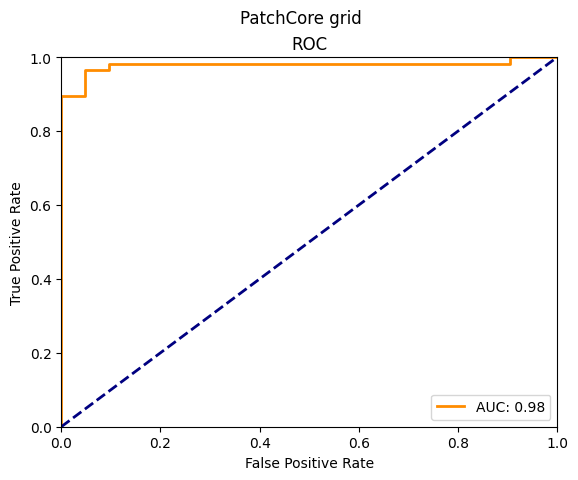

PatchCore grid AUROC:  0.9791145324707031


In [4]:
import torch
import matplotlib.pyplot as plt
from anomalib.data import MVTec
from anomalib.engine import Engine
from anomalib.models import Patchcore
from anomalib.metrics import AUROC
flatSurfaceCategories = ["tile", "leather", "grid"]
'''
# Load the MVTec dataset
for category in flatSurfaceCategories:
    datamodule = MVTec(root="/workspaces/eng-ai-agents/assignments/assignment-2b/datasets/MVTec", category=category)
    datamodule.prepare_data()
'''
for category in flatSurfaceCategories:
    # Load in the data manager
    datamodule = MVTec(category=category)
    # Split the data into train, val, and test data
    datamodule.setup()
    # Define the model
    model = Patchcore()
    engine = Engine(max_epochs=5)
    # Train the model(Already trained, do not retrain)
    #engine.fit(datamodule=datamodule, model=model)
    # Make predictions
    predictions = engine.predict(
        dataset=datamodule.test_data,
        model=model,
        ckpt_path=f"./results/Patchcore/MVTec/{category}/v0/weights/lightning/model.ckpt",
    )
    # Extract y_hat(pred) and y(labels) from the messy predictions variable
    testDataLen = datamodule.test_data.__len__()
    preds = torch.empty(testDataLen,dtype=torch.float16)
    labels = torch.empty(testDataLen,dtype=torch.int)
    for i in range(testDataLen):
        preds[i] = float(predictions[i]['pred_scores'].item())
        labels[i] = int(predictions[i]['label'].item())
    # Compute AUROC score
    auroc = AUROC()
    auroc(preds, labels)
    # Switch matplotlib backend, otherwise ROC curve won't plot
    %matplotlib module://matplotlib_inline.backend_inline
    # Plot ROC curve
    fig, title = auroc.generate_figure()
    plt.suptitle(f"PatchCore {category}")
    plt.show()
    print(f"PatchCore {category} AUROC: ", auroc.compute().item())

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/workspaces/eng-ai-agents/.venv/lib/python3.11/site-packages/anomalib/engine/engine.py:391: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Pleas

Predicting: |          | 0/? [00:00<?, ?it/s]

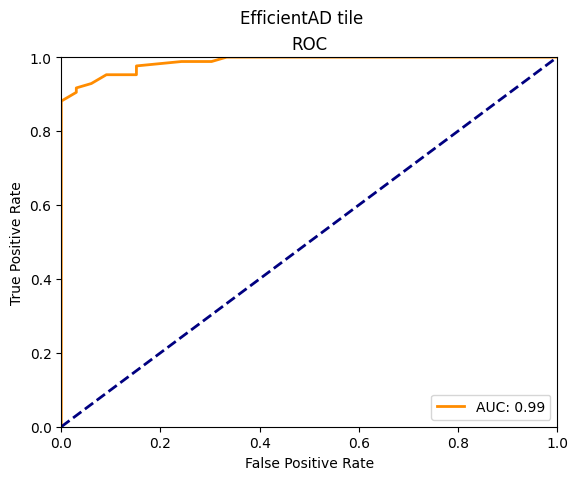

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/workspaces/eng-ai-agents/.venv/lib/python3.11/site-packages/anomalib/engine/engine.py:391: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Pleas

EfficientAD tile AUROC:  0.9871934056282043


Loaded model weights from the checkpoint at /workspaces/eng-ai-agents/assignments/assignment-2b/results/EfficientAd/MVTec/leather/v0/weights/lightning/model.ckpt
/workspaces/eng-ai-agents/.venv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

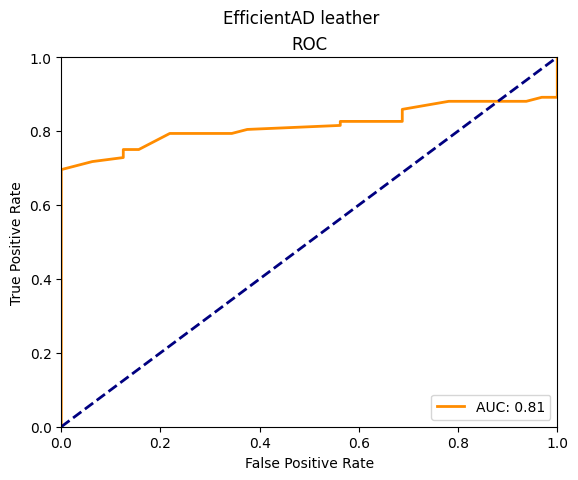

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/workspaces/eng-ai-agents/.venv/lib/python3.11/site-packages/anomalib/engine/engine.py:391: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Pleas

EfficientAD leather AUROC:  0.8148776888847351


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /workspaces/eng-ai-agents/assignments/assignment-2b/results/EfficientAd/MVTec/grid/v0/weights/lightning/model.ckpt
/workspaces/eng-ai-agents/.venv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

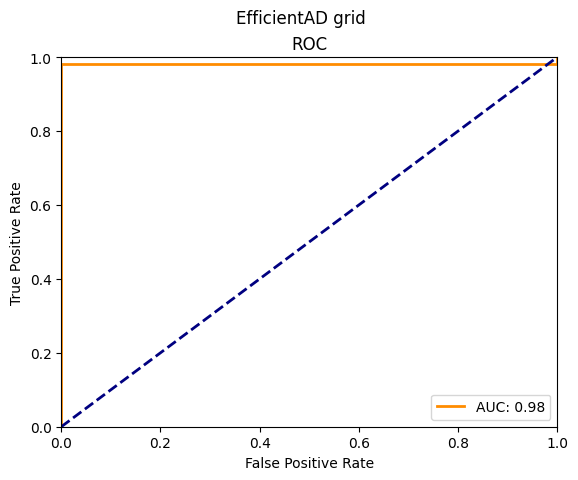

EfficientAD grid AUROC:  0.9824560880661011


In [5]:
from anomalib.models import EfficientAd
for category in flatSurfaceCategories:
    # Load in the data manager
    datamodule = MVTec(train_batch_size=1, category=category)
    # Split the data into train, val, and test data
    datamodule.setup()
    # Define the model
    model = EfficientAd()
    engine = Engine(max_epochs=5)
    # Train the model(Already trained, do not retrain)
    #engine.fit(datamodule=datamodule, model=model)
    # Make predictions
    predictions = engine.predict(
        dataset=datamodule.test_data,
        model=model,
        ckpt_path=f"./results/EfficientAd/MVTec/{category}/v0/weights/lightning/model.ckpt",
    )
    # Extract y_hat(pred) and y(labels) from the messy predictions variable
    testDataLen = datamodule.test_data.__len__()
    preds = torch.empty(testDataLen,dtype=torch.float16)
    labels = torch.empty(testDataLen,dtype=torch.int)
    for i in range(testDataLen):
        preds[i] = float(predictions[i]['pred_scores'].item())
        labels[i] = int(predictions[i]['label'].item())
    # Compute AUROC score
    auroc = AUROC()
    auroc(preds, labels)
    # Switch matplotlib backend, otherwise ROC curve won't plot
    %matplotlib module://matplotlib_inline.backend_inline
    # Plot ROC curve
    fig, title = auroc.generate_figure()
    plt.suptitle(f"EfficientAD {category}")
    plt.show()
    print(f"EfficientAD {category} AUROC: ", auroc.compute().item())